In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-income/CAINC1__ALL_AREAS_1969_2022.csv
/kaggle/input/personal-income/CAINC1_MD_1969_2022.csv
/kaggle/input/personal-income/Maryland_Physical_Boundaries_-_County_Boundaries_(Generalized).geojson


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import geopandas as gpd
import folium

In [4]:
md_boundaries = gpd.read_file('/kaggle/input/personal-income/Maryland_Physical_Boundaries_-_County_Boundaries_(Generalized).geojson')
md_boundaries['GeoFIPS'] = md_boundaries.county_fip.apply(lambda x: '24'+ str(x).zfill(3))

In [5]:
md_inc = pd.read_csv('/kaggle/input/personal-income/CAINC1_MD_1969_2022.csv', 
                      skipfooter=4,
#                       nrows = 5448
                     engine = 'python'
                    ).drop(columns = ['TableName', 'IndustryClassification', 'Unit', 'LineCode'])
md_inc['Description'] = md_inc.Description.apply(lambda x: x.split(' (')[0])
md_inc['GeoName'] = md_inc.GeoName.apply(lambda x: x.split(',')[0])
# md_inc['State'] = md_inc.GeoName.apply(lambda x: x.split(',')[1])

In [6]:
md_pinc = md_inc.loc[md_inc.Description == 'Personal income', :].reset_index()
md_pop = md_inc.loc[md_inc.Description == 'Population',:].reset_index()

md_pinc_pct = md_pinc.loc[1:,'1969':'2022'].div(md_pinc.loc[0,'1969':'2022']).set_index(md_pinc.GeoName[1:])
md_pop_pct = md_pop.loc[1:,'1969':'2022'].div(md_pop.loc[0,'1969':'2022']).set_index(md_pop.GeoName[1:])


md_diff = md_pinc_pct - md_pop_pct

<Axes: >

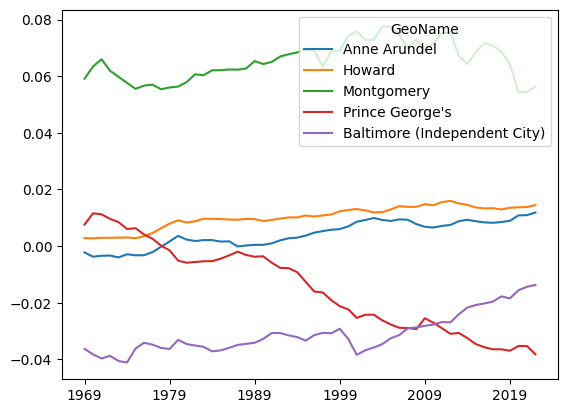

In [7]:
md_diff.loc[['Anne Arundel', 'Howard', 'Montgomery', "Prince George's",
       'Baltimore (Independent City)'], :].T.plot.line()


In [8]:
import plotly
import plotly.express as px

In [9]:
fig = px.choropleth(md_boundaries,
                           geojson=md_boundaries.geometry,
                           locations = md_boundaries.index,
#                            center={"lat": 45.5517, "lon": -73.7073},
                           color = 'shape_Area',
                           projection ="mercator",
#                            zoom=5
                          )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()